# Project 1: 2001 SAT Score analysis

SAT is a test that students in the USA takes in order to improve their credentials for college/university admission. It is not a compulsory test and depending on the policies made by the school and the different states, students participation rate varies. 

The data here describes some SAT related statistics for all states in the U.S and the District of Columbia in 2001. The data set consists of the average mathematics score, average verbal score and participation rate respectively.

The aim of the exerciese is to practise using Python (without Pandas) to explore data. 

### Load the data

Without using Pandas, the easiest way to load a csv is to use the csv module. Numpy is also used here to turn the resultant data into arrays for easier manipulation. Note that I am currently working with Python 2.7 and it does not return floats as a result from division. Therefore decimal numbers would be rounded off, which is not a desrable result. Therefore division from the __future__ module is used to make Python returns the proper values in divisions.

In [1]:
from __future__ import division
import numpy as np
import csv
with open('../project_data/sat_scores.csv', 'r') as f:
    sat_scores_full = np.array(list(csv.reader(f)))

In [2]:
print sat_scores_full[:5]

[['State' 'Rate' 'Verbal' 'Math']
 ['CT' '82' '509' '510']
 ['NJ' '81' '499' '513']
 ['MA' '79' '511' '515']
 ['NY' '77' '495' '505']]


The above cell prints the first 5 items in the sat_scores_full array. This works similarly to the head() operation in Pandas. However it should be noted that the headers are part of the full array hence needed seperation before data manipulation is carried out.

In [4]:
labels = sat_scores_full[0]
sat_scores = sat_scores_full[1:]
print labels
print sat_scores[:5]

['State' 'Rate' 'Verbal' 'Math']
[['CT' '82' '509' '510']
 ['NJ' '81' '499' '513']
 ['MA' '79' '511' '515']
 ['NY' '77' '495' '505']
 ['NH' '72' '520' '516']]


In order to select a column, we can find out the index of such column in the index list. Then apply it into the main data matrix.

In [5]:
state_index = labels.tolist().index('State')
states = [i[state_index] for i in sat_scores]
states[:5]

['CT', 'NJ', 'MA', 'NY', 'NH']

Data types greatly affect how one can/should approach the analysis. Therefore it is generally a good practise to check the data types in our data.

In [7]:
"""It is possible for the data to have different types even they are in the same column.
   Therefore I have looped through the rows to examine every data points in the set and 
   use a unique() method to return the data type(s) that exist in a column
"""
import numpy as np
state_type, rate_type, verbal_type, math_type = [],[],[],[]
label_type = [state_type, rate_type, verbal_type, math_type]
for type_ in label_type:
    for row in sat_scores:
        type_.append(type(row[label_type.index(type_)]))
    print np.unique(type_)   

[<type 'numpy.string_'>]
[<type 'numpy.string_'>]
[<type 'numpy.string_'>]
[<type 'numpy.string_'>]


From the above check we can see that Rate, Verbal and Math are all currently strings and will need to be reassigned to float (for easier manipulations). We can confirm this by observing the abscense of quotation marks around the numbers.

In [6]:
num_sat_scores = []
for row in sat_scores:
    num_row = []
    for i in row:
        if i[0] in '1234567890':
            i = i.astype(float)
        num_row.append(i)
    num_sat_scores.append(num_row)
print num_sat_scores[:5]

[['CT', 82.0, 509.0, 510.0], ['NJ', 81.0, 499.0, 513.0], ['MA', 79.0, 511.0, 515.0], ['NY', 77.0, 495.0, 505.0], ['NH', 72.0, 520.0, 516.0]]


Data can be formatted and stored in different structures. We have alreay experienced lists and arrays. Sometimes it would be easier to store data into dictionaries. This would be convenient when we want to take advantage of the key,value pair properties of data. It serves like a look up table and user will not need to take another step to find out irrelevant information such as the index.

In [8]:
def gen_dic(lst):
    dic1, dic2, dic3 = {},{},{}
    for row in lst:
        dic1[row[0]] = row[1]
        dic2[row[0]] = row[2]
        dic3[row[0]] = row[3]
    return dic1, dic2, dic3

rate, verbal, math = gen_dic(num_sat_scores)
print rate.items()[:3] # .items() return both the key and the value of a dictionary in a tuple.
print verbal.items()[:3]
print math.items()[:3]

[('WA', 53.0), ('DE', 67.0), ('DC', 56.0)]
[('WA', 527.0), ('DE', 501.0), ('DC', 482.0)]
[('WA', 527.0), ('DE', 499.0), ('DC', 474.0)]


Similar to other data structures, dictionaries can be nested too.

In [10]:
sat = {}
sat['rate'] = rate
sat['verbal'] = verbal
sat['math'] = math
print sat.keys() # return the keys of the dictionaries. The value for each keys in this case would be their dictionaries

['rate', 'math', 'verbal']


### Describe the data

In this part for the analysis, we would look at some simple methods to describe the data. It would allow us to roughly understand what the data is like and could pick out points that we should be aware of.

In [11]:
for col in sat:
    print 'For %s, maximum value is %d, minimum value is %d' % (str(col), max(sat[col].values()), min(sat[col].values()))

For rate, maximum value is 82, minimum value is 4
For math, maximum value is 603, minimum value is 439
For verbal, maximum value is 593, minimum value is 482


From the above we can see the participation rate varies from 4% to 82% which is quite a lot. The scores that the students achieved have also got a wide range with the maximum being around 40% higher than the minimum. In order to define how wide spread the data is, the standard deviation is calculated.

In [12]:
def stdev(data):
    return (np.sum(np.array([i-(sum(data)/len(data)) for i in data])**2)/len(data))**0.5
#tried to avoid using numpy built in function

#Print labels again check column names and their indexes:
print labels

"""

Rate, Verbal and Math are numerical so apply function on them

Note:
When changing data type to array, numpy autiomatically changes all data points to type str 
because of the first column being a str type (numpy doens't like different data types in a single array). 
Therefore .astype() is used to convert numbers back to float

"""
array_num_sat_scores = np.array(num_sat_scores)
rate_lst = array_num_sat_scores[:,1].astype(float)
verbal_lst = array_num_sat_scores[:,2].astype(float)
math_lst = array_num_sat_scores[:,3].astype(float)

print stdev(rate_lst)
print stdev(verbal_lst)
print stdev(math_lst)

['State' 'Rate' 'Verbal' 'Math']
27.0379964945
32.9150949616
35.6669961643


Assuming a normal distribution, 63% of the data falls between 1 stadard deviation interval. The above values show the standard deviation for each individaul features. Looking at these numbers there seems to be no obvious issue despite a larger range. There are no missing values (or else errors would come up during manipulation) or values that looks very out of place.

### Visualize the data

Visualising the data often helps a data scientis to gain a deeper understanding of the data distribution. This is because even with the same descriptive statistics (e.g. mean and standard deviation) the distribution can look different. Here Matplotlib is used to generate visulisations to help understandin the data

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns #import seaborn here for it nice formatting on matplotlib
from scipy import stats # required for later plotting
%matplotlib inline

##### Plotting the Math distribution

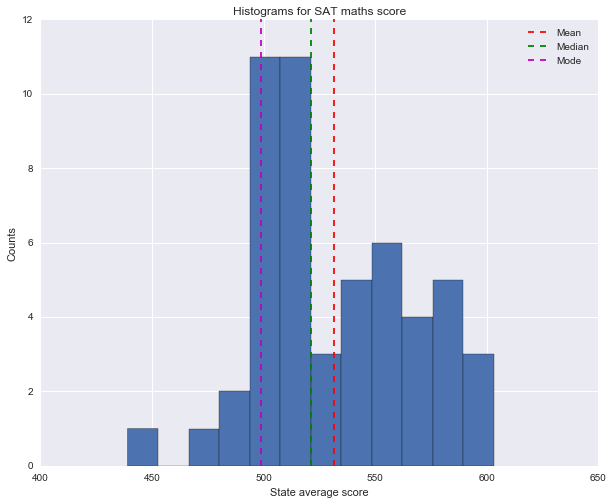

In [14]:
# copute all the required statistics to be plotted
math_mean = np.mean(math_lst)
math_median = np.median(math_lst)
math_mode = stats.mode([int(i) for i in math_lst])
math_mode_plt = int(list(math_mode)[0])
math_std = np.std(math_lst)

# graph plotting
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.hist(math_lst, bins = 12)
ax.set(xlabel = 'State average score', ylabel = 'Counts', title = 'Histograms for SAT maths score')
ax.axvline(math_mean, color='r', linestyle='dashed', label='Mean')
ax.axvline(math_median, color='g', linestyle='dashed', label='Median')
ax.axvline(math_mode_plt, color='m', linestyle='dashed', label='Mode')
plt.legend()

plt.show()

##### Plotting the Verbal distribution

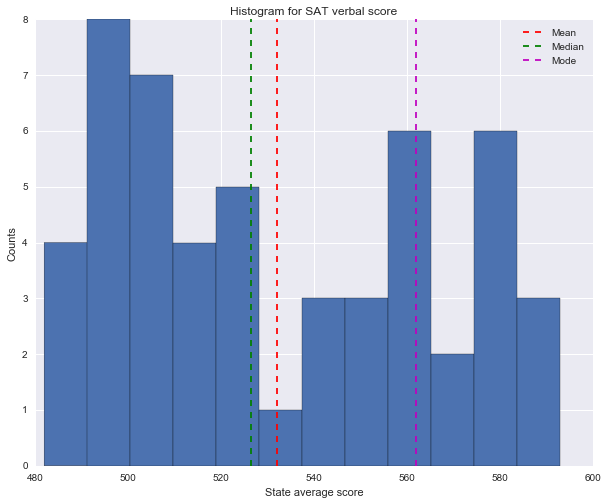

In [15]:
# repeat similar procedure for verbal column
verbal_mean = np.mean(verbal_lst)
verbal_median = np.median(verbal_lst)
verbal_mode = stats.mode(verbal_lst)
verbal_mode_plot = int(list(verbal_mode)[0])
verbal_std = np.std(verbal_lst)

#graph plotting
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.hist(verbal_lst, bins=12)
ax.axvline(verbal_mean, color='r', linestyle='dashed', label='Mean')
ax.axvline(verbal_median, color='g', linestyle='dashed', label='Median')
ax.axvline(verbal_mode_plot, color='m', linestyle='dashed', label='Mode')
ax.set(xlabel = 'State average score', ylabel = 'Counts', title='Histogram for SAT verbal score')
plt.legend()
plt.show()


The same plots can be created using Seaborn. Seaborn is a module that base on Matplotlib but with better aesthetic elements. Its interface in creating certain plots (e.g box) is better than Matplotlib

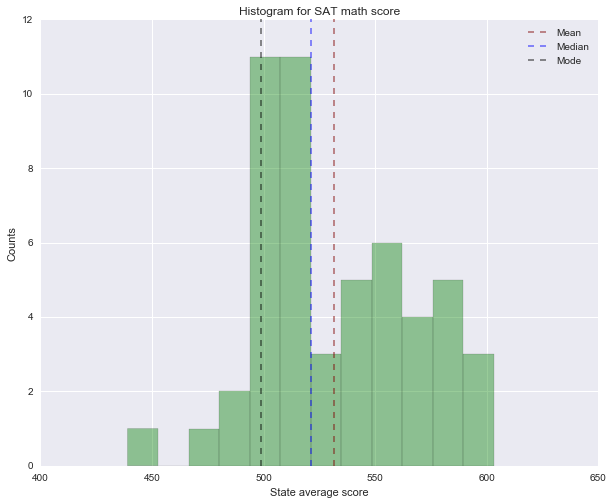

In [20]:
fig =  plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.distplot(math_lst, bins = 12, color='green', kde=False, ax=ax)
ax.axvline(math_mean, color='maroon', linestyle='dashed', label='Mean', alpha=0.5)
ax.axvline(math_median, color='b', linestyle='dashed', label='Median', alpha=0.5)
ax.axvline(math_mode_plt, color='k', linestyle='dashed', label='Mode', alpha=0.5)
ax.set(xlabel = 'State average score', ylabel = 'Counts', title='Histogram for SAT math score')
plt.legend()
plt.show()

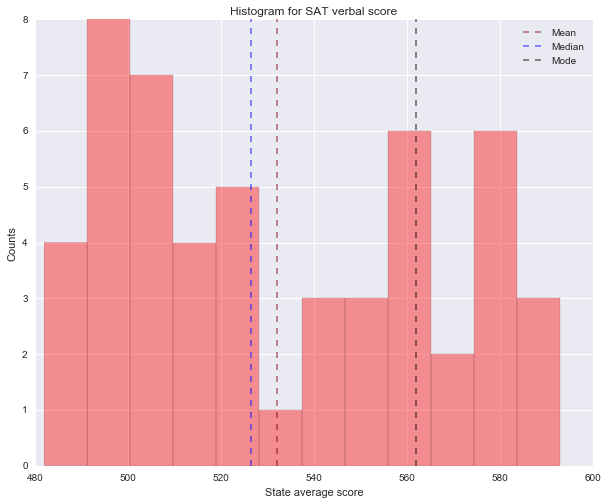

In [21]:
fig =  plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
sns.distplot(verbal_lst, bins = 12, color='red', kde=False, ax=ax)
ax.axvline(verbal_mean, color='maroon', linestyle='dashed', label='Mean', alpha=.5)
ax.axvline(verbal_median, color='b', linestyle='dashed', label='Median', alpha=.5)
ax.axvline(verbal_mode_plot, color='k', linestyle='dashed', label='Mode', alpha=.5)
ax.set(xlabel = 'State average score', ylabel = 'Counts', title='Histogram for SAT verbal score')
plt.legend()
plt.show()

Coming back to the data, the typical assumption for most data is that they follow a normal distribution. This is because according to the Central Limit Theorem, the distribution of sameple means of large samples (more than 30) would closely follow a normal distribution.

In a perfect normal distribution, the metrics of central tendency should be identical. That is mean = median = mode. From the histgrams above, it is shownn that this is not the case for either of the SAT scores. The standard deviation for the data is shown below

In [16]:
print 'Summary statistics for maths and verbal scores:'
print '==============================================='
print ''
print 'Maths mean: ', math_mean
print 'Maths median: ', math_median
print 'Maths mode: ', math_mode_plt
print 'Maths standard deviation: ', math_std
print ''
print 'Verbal mean: ', verbal_mean
print 'Verbal median: ', verbal_median
print 'Verbal mode: ', verbal_mode_plot
print 'Verbal standard deviation: ', verbal_std

Summary statistics for maths and verbal scores:

Maths mean:  531.5
Maths median:  521.0
Maths mode:  499
Maths standard deviation:  35.6669961643

Verbal mean:  532.019230769
Verbal median:  526.5
Verbal mode:  562
Verbal standard deviation:  32.9150949616


From the statistics and plotted figures above, it can be concluded that the distribution for maths score is positively skewed. This can be verified by the evidence of peak at the lower end and the long tail at the higher end in the plot. Statistics also suggest that mean > median > mode which is a typical characteristic in positively skewed distributions.

There is a hint suggesting that the verbal scores is positively skewed as well. Since the mean is greater than the median. However there is an interesting observation showing that apart from the global peak at the 490-500 mark, there is also a local peak between the 560 - 580 mark. This causes the distribution to look slightly bimodal. This means most students are either very good at verbal skills or they are not quite up to average. (Although whether the 'average' here is meaningful is up for debate.) 

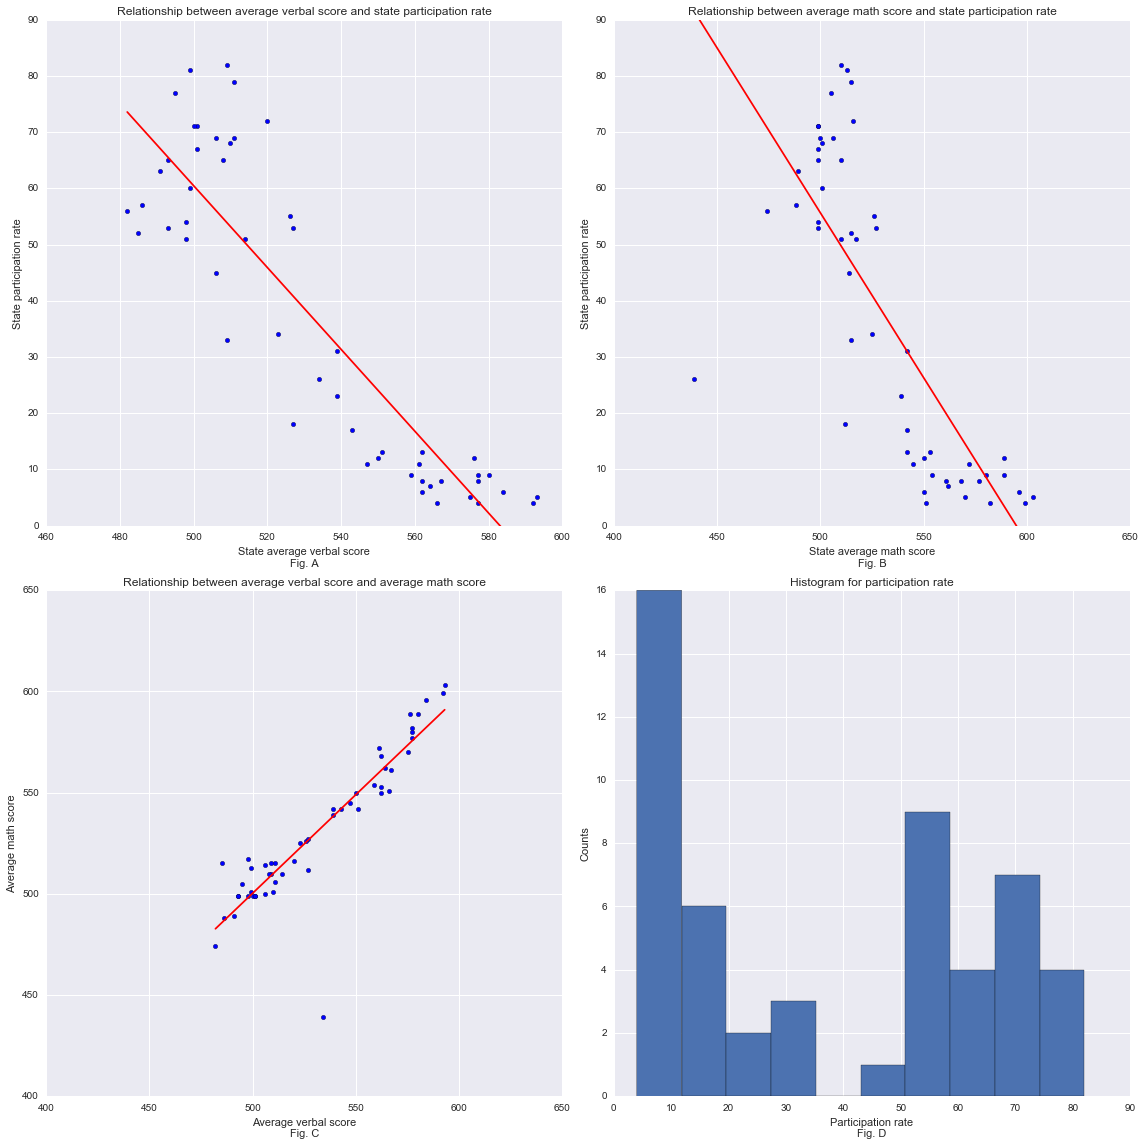

In [17]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(221)
ax1.scatter(verbal_lst, rate_lst)
ax1.set(ylim = [0,90], xlabel = 'State average verbal score\nFig. A', ylabel = 'State participation rate', title='Relationship between average verbal score and state participation rate')
ax1_line = np.polyfit(verbal_lst, rate_lst,1)
ax1_grad = ax1_line[0]
ax1_intercept = ax1_line[1]
ax1_linex = [min(verbal_lst), max(verbal_lst)]
ax1_liney = [x*ax1_grad + ax1_intercept for x in ax1_linex]
ax1.plot(ax1_linex, ax1_liney, color = 'r')
ax2 = fig.add_subplot(222)
ax2.scatter(math_lst, rate_lst)
ax2.set(ylim = [0,90], xlabel = 'State average math score\nFig. B', ylabel = 'State participation rate', title='Relationship between average math score and state participation rate')
ax2_line = np.polyfit(math_lst, rate_lst,1)
ax2_grad = ax2_line[0]
ax2_intercept = ax2_line[1]
ax2_linex = [min(math_lst), max(math_lst)]
ax2_liney = [x*ax2_grad + ax2_intercept for x in ax2_linex]
ax2.plot(ax2_linex, ax2_liney, color = 'r')
ax3 = fig.add_subplot(223)
ax3.scatter(verbal_lst, math_lst)
ax3.set(xlim = [400,650], xlabel = 'Average verbal score\nFig. C', ylabel = 'Average math score', title='Relationship between average verbal score and average math score')
ax3_line = np.polyfit(verbal_lst, math_lst,1)
ax3_grad = ax3_line[0]
ax3_intercept = ax3_line[1]
ax3_linex = [min(verbal_lst), max(verbal_lst)]
ax3_liney = [x*ax3_grad + ax3_intercept for x in ax3_linex]
ax3.plot(ax3_linex, ax3_liney, color = 'r')
ax4 = fig.add_subplot(224)
ax4.hist(rate_lst)
ax4.set(xlabel = 'Participation rate\nFig. D', ylabel = 'Counts', title='Histogram for participation rate')
plt.tight_layout()
plt.show()


There are quite a few interesting observations that worth mentioning. The most intuitive figure in the above plots is Fig. C where it displays the average verbal score against the average math score. As one might expect, a higher verbal score very oftenly correlates with a higher math score. A line of best fit is created using numpy's polyfit operation. It is created by minimizing the squared error. After plotting the line it is obvious that there is an outlier with a verbal score of around 530 and a math score of around 440. We can find out who the outlier is by finding the state with the lowest math score.

In [18]:
print sorted(zip(states,math_lst), key = lambda x:x[1])[0]

('OH', 439.0)


According to this <a href = https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations>Wikipeida page</a>, the abbreviation "OH' represents Ohio. An investigation was carried out as an attempt to find out the reason for this unexpectedly low score. After a brief search <a href = http://media.collegeboard.com/digitalServices/pdf/research/cb-seniors-2001-OH.pdf >a SAT report </a> written by the client was discovered. Inside page 1 of the report, under the "SAT Program Test Takers" table, along the "Students with SAT I Scores" row, it can be seen that the average verbal score is 534 which matches the data here. However the average maths score is recorded as 539 instead of 439. It means that there is a data entry error in either our data set or the report. However given that our data point is an obvious outlier, it is very likely that our data is the wrong one.  

Fig A and Fig B both demonstrate interesting relationships between SAT scores and states participation rate. The gradeints in both figures are negative which indicates that high participation rate results in lower average socres. Intuitively this is expected. It is reasonable to assume students academic ability are distributed normally across populations. Most student are average while small proportions are either very smart/hardworking or have difficulties catching up. SAT is not compulsory but students are advised to take it if they would like to be admitted to a 'well-known' or 'higher ranked' university. Therefore at placess where participation rate is low, it is very likely that those participants are the ones who are alreay doing well in school and would like to enter a higher ranked university. In other states, taking the SAT is either compulsory or highly encouragedsome average. Which means many average students would take the test and drive up participation rate. It is reasonable to assume that the average students would not score as high as the top students hence lowering the average.

Below shows some other types of plots that can give us an idea of how the data distribute.

##### Box plots for each variable. 

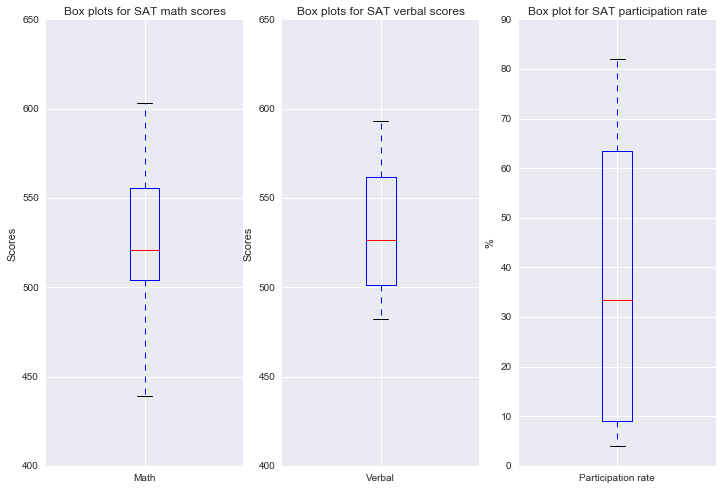

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(131)
ax1.boxplot(math_lst)
ax1.set(ylabel = 'Scores', title = 'Box plots for SAT math scores', xticklabels = ['Math'])
ax2 = fig.add_subplot(132)
ax2.boxplot(verbal_lst)
ax2.set(title = 'Box plots for SAT verbal scores', xticklabels = ['Verbal'], ylim=[400,650], ylabel = 'Scores')
ax3 = fig.add_subplot(133)
ax3.boxplot(rate_lst)
ax3.set(ylabel = '%', title = 'Box plot for SAT participation rate', xticklabels = ['Participation rate'])

plt.show()


##### Heat map for SAT math score in different states

<img src = http://res.cloudinary.com/dexpzle9i/image/upload/v1476574804/Math_iiqzhl.jpg>

##### Heat map for SAT verbal score in different states

<img src = http://res.cloudinary.com/dexpzle9i/image/upload/v1476574811/Verbal_mvirtt.jpg>

##### Heat map for SAT participation rate in different states

<img src = http://res.cloudinary.com/dexpzle9i/image/upload/v1476574817/Rate_faror5.jpg>

##### Some more plotting using Seaborn

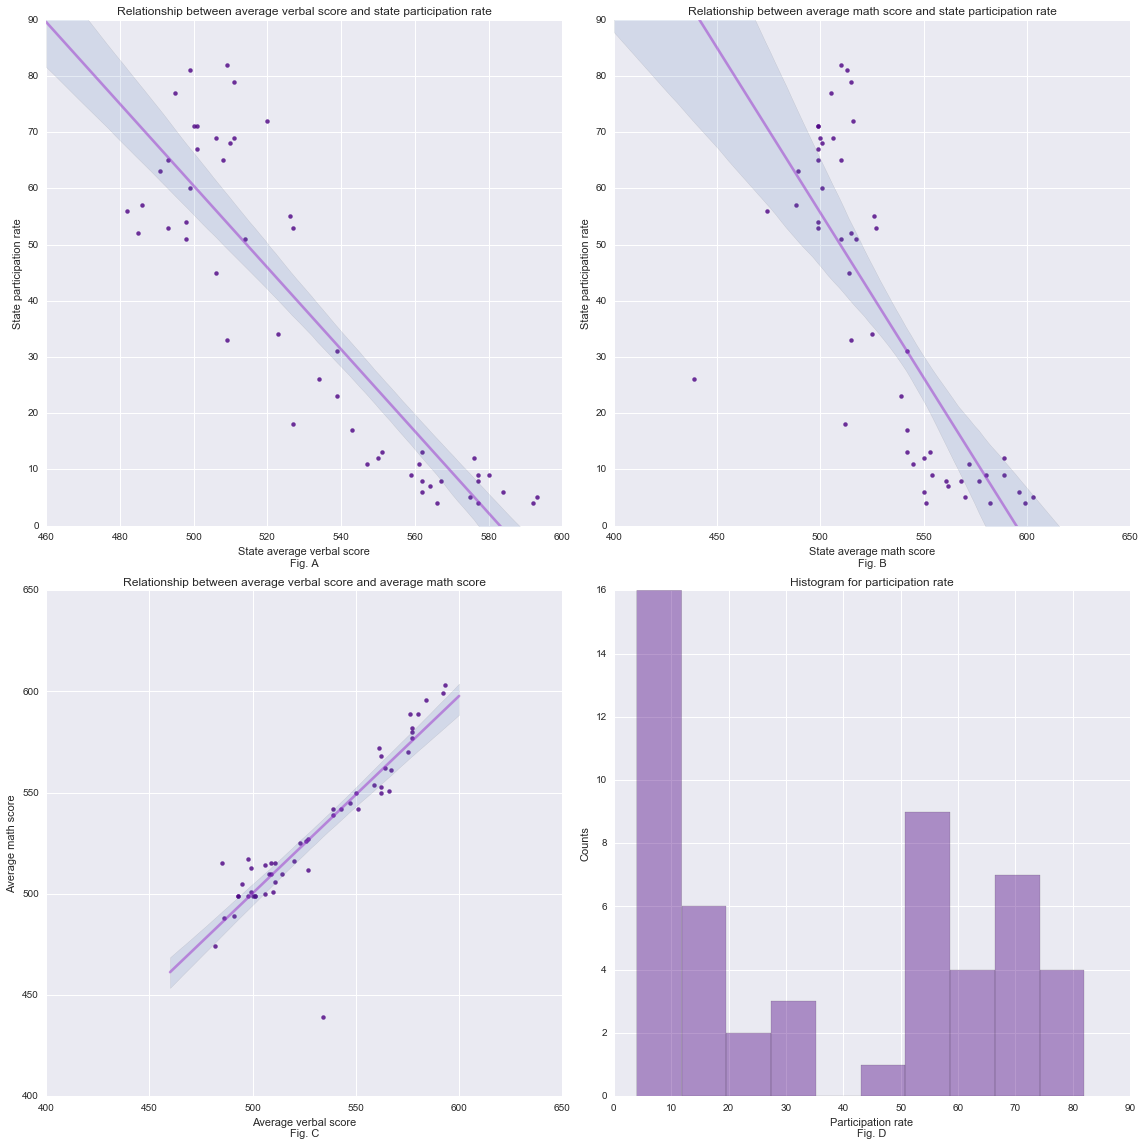

In [23]:
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(221)
sns.regplot(verbal_lst, rate_lst, ax=ax1, scatter_kws={"c":'indigo'}, line_kws={'c':'darkorchid', 'alpha':0.5})
ax1.set(ylim = [0,90], xlabel = 'State average verbal score\nFig. A', ylabel = 'State participation rate', title='Relationship between average verbal score and state participation rate')
ax2 = fig.add_subplot(222)
sns.regplot(math_lst, rate_lst, ax=ax2, scatter_kws={"c":'indigo'}, line_kws={'c':'darkorchid', 'alpha':0.5})
ax2.set(ylim = [0,90], xlabel = 'State average math score\nFig. B', ylabel = 'State participation rate', title='Relationship between average math score and state participation rate')
ax3 = fig.add_subplot(223)
sns.regplot(verbal_lst, math_lst, ax=ax3, scatter_kws={"c":'indigo'}, line_kws={'c':'darkorchid', 'alpha':0.5})
ax3.set(xlim = [400,650], xlabel = 'Average verbal score\nFig. C', ylabel = 'Average math score', title='Relationship between average verbal score and average math score')
ax4 = fig.add_subplot(224)
sns.distplot(rate_lst, kde=False, ax=ax4, bins=10, color='indigo')
ax4.set(xlabel = 'Participation rate\nFig. D', ylabel = 'Counts', title='Histogram for participation rate')
plt.tight_layout()
plt.show()

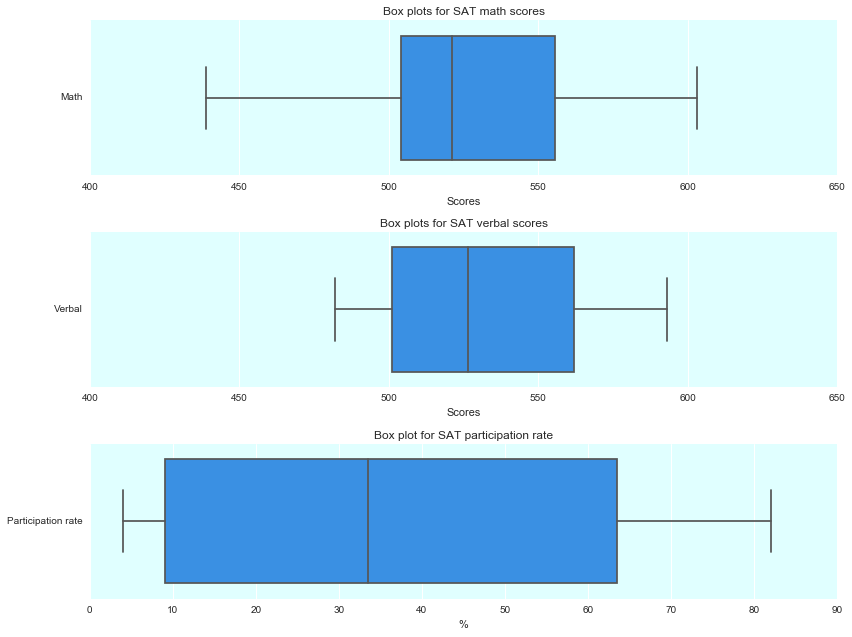

In [28]:
sns.set(rc={'axes.facecolor':'lightcyan'})
fig = plt.figure(figsize=(12,9))
ax1 = fig.add_subplot(311)
sns.boxplot(math_lst, ax=ax1, color='dodgerblue')
ax1.set(xlabel = 'Scores', title = 'Box plots for SAT math scores', yticklabels = ['Math'])
ax2 = fig.add_subplot(312)
sns.boxplot(verbal_lst, ax=ax2, color='dodgerblue')
ax2.set(title = 'Box plots for SAT verbal scores', yticklabels = ['Verbal'], xlim=[400,650], xlabel = 'Scores')
ax3 = fig.add_subplot(313)
sns.boxplot(rate_lst, ax=ax3, color='dodgerblue')
ax3.set(xlabel = '%', title = 'Box plot for SAT participation rate', yticklabels = ['Participation rate'])
plt.tight_layout()
plt.show()

### Conclusion

This notebook shows how one can maipulate and visualise data without Pandas. Although it involves a larger number of steps, it is still considered a feasible task. We have also explored different methods in plotting different graphs. From which we can futher understand how EDA and visualisation could help us in spotting the potential mistakes within the data set.